In [4]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [37]:
data = yf.download(tickers='BTC-USD',period = '2y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [40]:
#Moving average using Python Rolling function
data['MA5'] = data['Close'].rolling(20).mean()
data['MA20'] = data['Close'].rolling(100).mean()

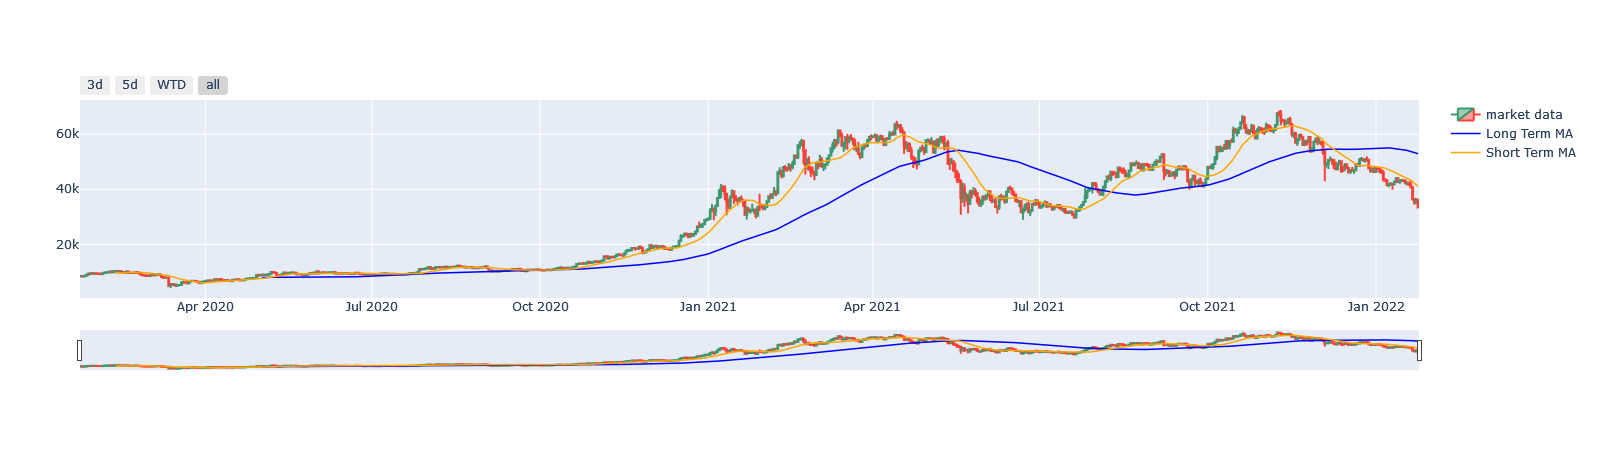

In [41]:
#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

#Add Moving average on the graph
fig.add_trace(go.Scatter(x=data.index, y= data['MA20'],line=dict(color='blue', width=1.5), name = 'Long Term MA'))
fig.add_trace(go.Scatter(x=data.index, y= data['MA5'],line=dict(color='orange', width=1.5), name = 'Short Term MA'))

#Updating X axis and graph
# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="3d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=7, label="WTD", step="day", stepmode="todate"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()
